# 1. Loading Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df_delivery = pd.read_csv("Data/deliveries.csv")
df_matches = pd.read_csv("Data/matches.csv")

In [ ]:
df_delivery.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [ ]:
df_matches.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

# 2. Familiarizing with Data

## Analysing delivery dataset

In [ ]:
df_delivery.shape

(179078, 21)

In [ ]:
df_delivery.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [ ]:
df_delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [ ]:
df_delivery.isnull().values.any()

True

In [ ]:
df_delivery.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


In [ ]:
for col in df_delivery.columns:
  print("###############################", col, "####################################")
  print(df_delivery[col].unique())
  print()

############################### match_id ####################################
[    1     2     3     4     5     6     7     8     9    10    11    12
    13    14    15    16    17    18    19    20    21    22    23    24
    25    26    27    28    29    30    31    32    33    34    35    36
    37    38    39    40    41    42    43    44    45    46    47    48
    49    50    51    52    53    54    55    56    57    58    59    60
    61    62    63    64    65    66    67    68    69    70    71    72
    73    74    75    76    77    78    79    80    81    82    83    84
    85    86    87    88    89    90    91    92    93    94    95    96
    97    98    99   100   101   102   103   104   105   106   107   108
   109   110   111   112   113   114   115   116   117   118   119   120
   121   122   123   124   125   126   127   128   129   130   131   132
   133   134   135   136   137   138   139   140   141   142   143   144
   145   146   147   148   149   150   151   1

## Analysing matches Dataset

In [ ]:
df_matches.shape

(756, 18)

In [ ]:
df_matches.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [ ]:
df_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [ ]:
df_matches.isnull().values.any()

True

In [ ]:
df_matches.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [ ]:
for col in df_matches.columns:
  print("###############################", col, "####################################")
  print(df_matches[col].unique())
  print()

############################### id ####################################
[    1     2     3     4     5     6     7     8     9    10    11    12
    13    14    15    16    17    18    19    20    21    22    23    24
    25    26    27    28    29    30    31    32    33    34    35    36
    37    38    39    40    41    42    43    44    45    46    47    48
    49    50    51    52    53    54    55    56    57    58    59    60
    61    62    63    64    65    66    67    68    69    70    71    72
    73    74    75    76    77    78    79    80    81    82    83    84
    85    86    87    88    89    90    91    92    93    94    95    96
    97    98    99   100   101   102   103   104   105   106   107   108
   109   110   111   112   113   114   115   116   117   118   119   120
   121   122   123   124   125   126   127   128   129   130   131   132
   133   134   135   136   137   138   139   140   141   142   143   144
   145   146   147   148   149   150   151   152   1

## Insights

In [ ]:
df_matches["city"].value_counts()

Mumbai            101
Kolkata            77
Delhi              74
Bangalore          66
Hyderabad          64
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Bengaluru          14
Visakhapatnam      13
Centurion          12
Ahmedabad          12
Rajkot             10
Mohali             10
Indore              9
Dharamsala          9
Johannesburg        8
Cuttack             7
Ranchi              7
Port Elizabeth      7
Cape Town           7
Abu Dhabi           7
Sharjah             6
Raipur              6
Kochi               5
Kanpur              4
Nagpur              3
Kimberley           3
East London         3
Bloemfontein        2
Name: city, dtype: int64

In [ ]:
df_matches["winner"].value_counts()

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

In [ ]:
df_matches["player_of_match"].value_counts()

CH Gayle          21
AB de Villiers    20
RG Sharma         17
MS Dhoni          17
DA Warner         17
                  ..
PD Collingwood     1
NV Ojha            1
AC Voges           1
J Theron           1
S Hetmyer          1
Name: player_of_match, Length: 226, dtype: int64

In [ ]:
df_matches["umpire1"].value_counts()

HDPK Dharmasena    73
Asad Rauf          51
S Ravi             49
AK Chaudhary       43
Aleem Dar          38
                   ..
Nanda Kishore       1
SJA Taufel          1
A Nanda Kishore     1
SL Shastri          1
Sundaram Ravi       1
Name: umpire1, Length: 61, dtype: int64

In [ ]:
df_matches["umpire2"].value_counts()

C Shamshuddin       57
S Ravi              57
SJA Taufel          54
RJ Tucker           38
CK Nandan           36
                    ..
Kumar Dharmasena     1
SD Fry               1
SJ Davis             1
Subroto Das          1
Ian Gould            1
Name: umpire2, Length: 65, dtype: int64

## Data handling

In [ ]:
df_delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [ ]:
df_delivery["player_dismissed"].fillna("No wicket", inplace = True)
df_delivery["dismissal_kind"].fillna("No wicket", inplace = True)
df_delivery["fielder"].fillna("No wicket", inplace = True)

In [ ]:
df_delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [ ]:
df_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [ ]:
r,c = df_matches.shape

In [ ]:
column_with_null = []
for col in df_matches.columns:
  na_value = df_matches[col].isna().sum()
  if na_value != 0:
    print(f"Column {col} has {na_value} null values")

Column city has 7 null values
Column winner has 4 null values
Column player_of_match has 4 null values
Column umpire1 has 2 null values
Column umpire2 has 2 null values
Column umpire3 has 637 null values


Using the most frequent value in column to replace nan values 

In [ ]:
df_matches = df_matches.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [ ]:
df_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             756 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           756 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  756 non-null    object
 14  venue            756 non-null    object
 15  umpire1          756 non-null    object
 16  umpire2          756 non-null    object
 17  umpire3          756 non-null    ob

In [ ]:
print(df_matches[df_matches.duplicated()])

Empty DataFrame
Columns: [id, season, city, date, team1, team2, toss_winner, toss_decision, result, dl_applied, winner, win_by_runs, win_by_wickets, player_of_match, venue, umpire1, umpire2, umpire3]
Index: []


In [ ]:
print(df_delivery[df_delivery.duplicated()])

        match_id  inning                 batting_team  \
52178        221       1               Mumbai Indians   
162805      7946       1             Rajasthan Royals   
162806      7946       1             Rajasthan Royals   
162870      7946       1             Rajasthan Royals   
162964      7946       2  Royal Challengers Bangalore   
166610     11144       2          Sunrisers Hyderabad   
167990     11150       1  Royal Challengers Bangalore   
168080     11150       2             Rajasthan Royals   
169404     11311       1  Royal Challengers Bangalore   
170110     11314       1        Kolkata Knight Riders   
170111     11314       1        Kolkata Knight Riders   
170117     11314       1        Kolkata Knight Riders   
170119     11314       1        Kolkata Knight Riders   
170120     11314       1        Kolkata Knight Riders   
171685     11320       2          Chennai Super Kings   
172216     11322       2               Mumbai Indians   
173344     11327       1       

# 3. Visualizing the data

Text(0.5, 1.0, 'Toss Win Count by Team')

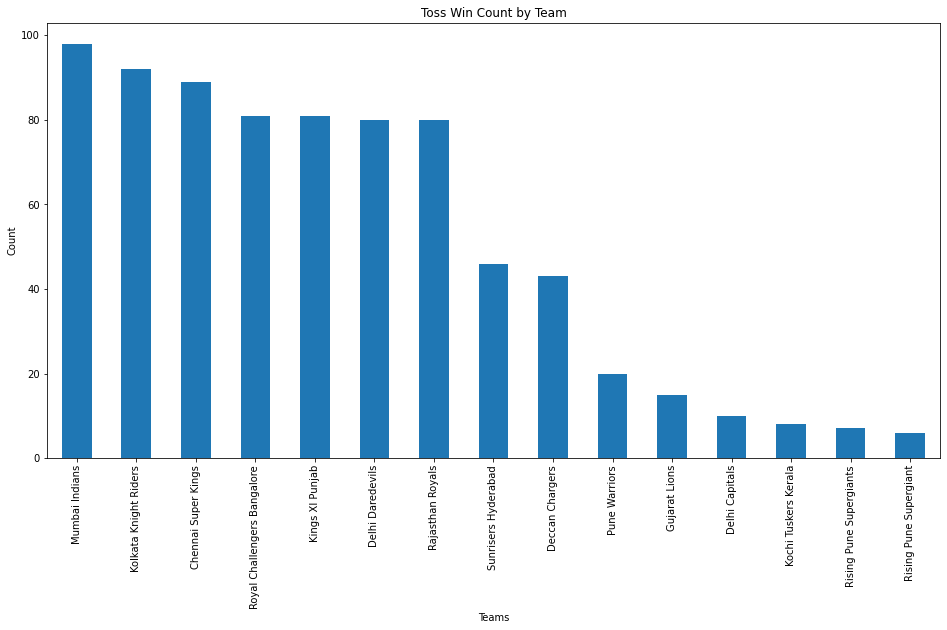

In [ ]:
ax = df_matches.toss_winner.value_counts().sort_values(ascending=False).plot(kind="bar", figsize=(16, 8))
ax.set_xlabel("Teams")
ax.set_ylabel("Count")
ax.set_title("Toss Win Count by Team")

Text(0.5, 1.0, 'Top 10 Player of the matchCount by Team')

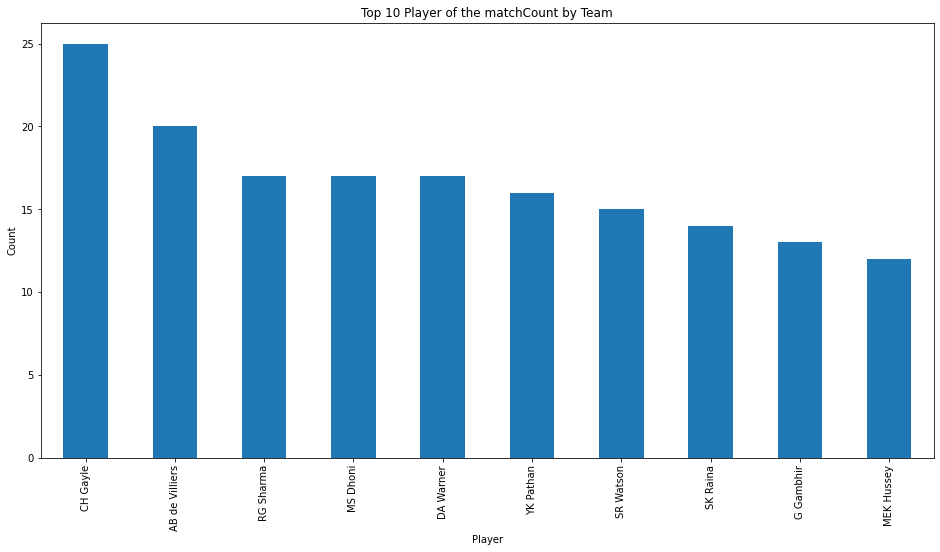

In [ ]:
ax = df_matches.player_of_match.value_counts().head(10).sort_values(ascending=False).plot(kind="bar", figsize=(16, 8))
ax.set_xlabel("Player")
ax.set_ylabel("Count")
ax.set_title("Top 10 Player of the matchCount by Team")

In [ ]:
corr = df_matches.corr()
corr.style.background_gradient(cmap='coolwarm')

,id,season,dl_applied,win_by_runs,win_by_wickets
id,1.000000,0.668304,-0.011658,-0.039403,-0.012239
season,0.668304,1.000000,-0.001116,-0.037529,-0.009379
dl_applied,-0.011658,-0.001116,1.000000,-0.016349,-0.011631
win_by_runs,-0.039403,-0.037529,-0.016349,1.000000,-0.560420
win_by_wickets,-0.012239,-0.009379,-0.011631,-0.560420,1.000000


Text(0.5, 1.0, 'Team that Won the Toss')

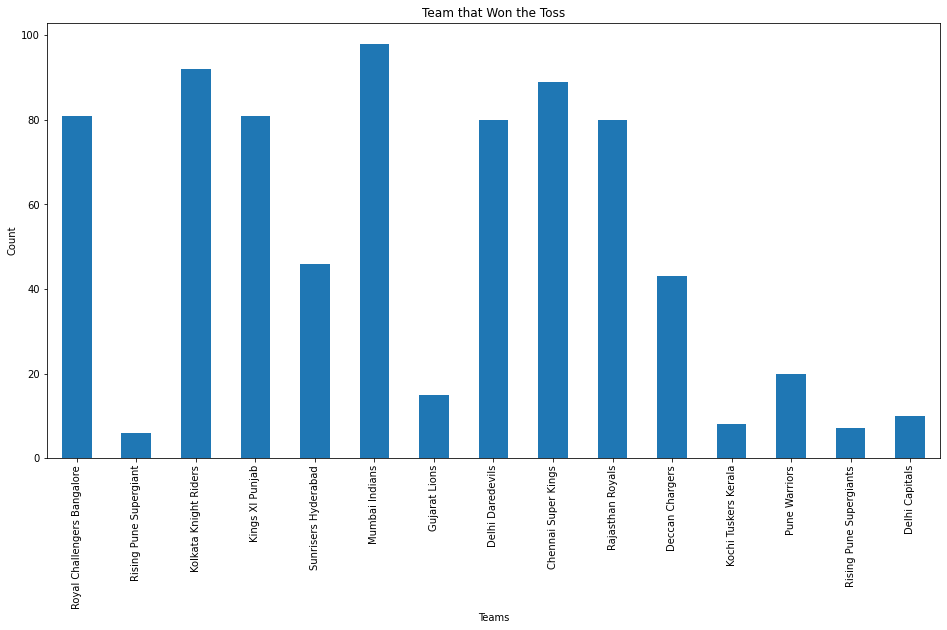

In [ ]:
ax = df_matches.toss_winner.value_counts(sort=False).plot(kind="bar", figsize=(16, 8))
ax.set_xlabel("Teams")
ax.set_ylabel("Count")
ax.set_title("Team that Won the Toss")

In [ ]:
df = df_matches[df_matches["win_by_runs"]>0]
df = df["winner"].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  import sys


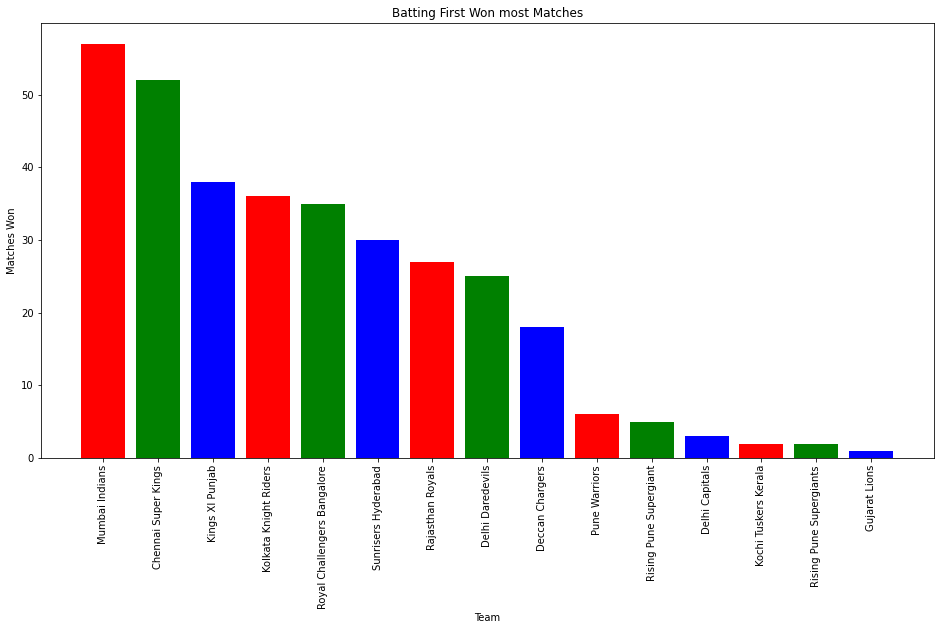

In [ ]:
team = list(df.index)
count = list(df.values)
  
fig = plt.figure(figsize = (16, 8))
 
# creating the bar plot
plt.bar(team, count, color ='rgb')

plt.xticks(rotation=90)
plt.xlabel("Team")
plt.ylabel("Matches Won")
plt.title("Batting First Won most Matches")
plt.show()

# 4. Data Analysis

In [ ]:
df_matches = df_matches.rename(columns = {"id" : "match_id"})

In [ ]:
merge_df = pd.merge(df_matches, df_delivery, on='match_id', how='inner')

In [ ]:
merge_df.shape

(179078, 38)

In [ ]:
merge_df.loc[merge_df.duplicated(), :]

,match_id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
52178,221,2010,Mumbai,2010-04-13,Mumbai Indians,Delhi Daredevils,Mumbai Indians,bat,normal,0,...,0,0,0,0,1,0,1,No wicket,No wicket,No wicket
162805,7946,2018,Jaipur,19/05/18,Rajasthan Royals,Royal Challengers Bangalore,Rajasthan Royals,bat,normal,0,...,0,0,0,0,4,0,4,No wicket,No wicket,No wicket
162806,7946,2018,Jaipur,19/05/18,Rajasthan Royals,Royal Challengers Bangalore,Rajasthan Royals,bat,normal,0,...,0,0,0,0,1,0,1,No wicket,No wicket,No wicket
162870,7946,2018,Jaipur,19/05/18,Rajasthan Royals,Royal Challengers Bangalore,Rajasthan Royals,bat,normal,0,...,0,0,0,0,0,0,0,No wicket,No wicket,No wicket
162964,7946,2018,Jaipur,19/05/18,Rajasthan Royals,Royal Challengers Bangalore,Rajasthan Royals,bat,normal,0,...,0,0,0,0,0,0,0,No wicket,No wicket,No wicket
166610,11144,2019,Hyderabad,29/03/19,Rajasthan Royals,Sunrisers Hyderabad,Rajasthan Royals,bat,normal,0,...,0,0,0,0,4,0,4,No wicket,No wicket,No wicket
167990,11150,2019,Jaipur,02/04/19,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,normal,0,...,0,0,0,0,1,0,1,No wicket,No wicket,No wicket
168080,11150,2019,Jaipur,02/04/19,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,normal,0,...,0,0,0,0,0,0,0,No wicket,No wicket,No wicket
169404,11311,2019,Bengaluru,07/04/19,Royal Challengers Bangalore,Delhi Capitals,Delhi Capitals,field,normal,0,...,0,0,0,0,0,0,0,No wicket,No wicket,No wicket
170110,11314,2019,Chennai,09/04/19,Kolkata Knight Riders,Chennai Super Kings,Chennai Super Kings,field,normal,0,...,0,0,0,0,0,0,0,No wicket,No wicket,No wicket


In [ ]:
merge_df = merge_df.drop_duplicates(keep="first")

In [ ]:
merge_df

,match_id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,0,No wicket,No wicket,No wicket
1,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,0,No wicket,No wicket,No wicket
2,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,4,0,4,No wicket,No wicket,No wicket
3,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,0,No wicket,No wicket,No wicket
4,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,2,2,No wicket,No wicket,No wicket
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2019,Hyderabad,12/05/19,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,...,0,0,0,0,1,0,1,No wicket,No wicket,No wicket
179074,11415,2019,Hyderabad,12/05/19,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,...,0,0,0,0,2,0,2,No wicket,No wicket,No wicket
179075,11415,2019,Hyderabad,12/05/19,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2019,Hyderabad,12/05/19,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,...,0,0,0,0,2,0,2,No wicket,No wicket,No wicket


In [ ]:
res = df_matches["venue"].value_counts(sort=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  import sys


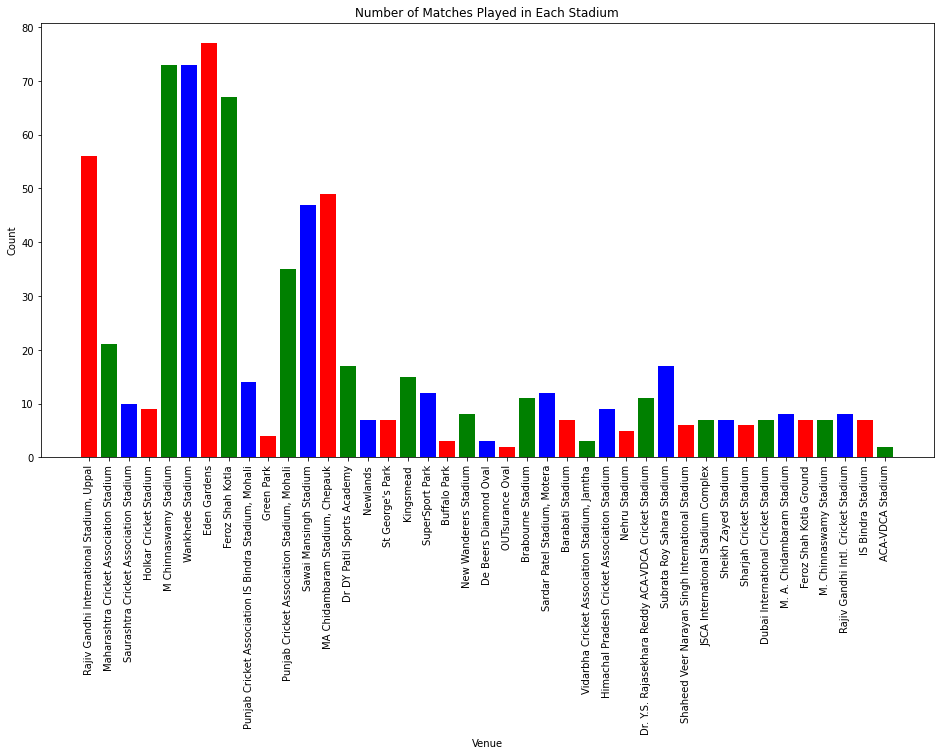

In [ ]:
venue = list(res.index)
count = list(res.values)
  
fig = plt.figure(figsize = (16, 8))
 
# creating the bar plot
plt.bar(venue, count, color ='rgb')

plt.xticks(rotation=90)
plt.xlabel("Venue")
plt.ylabel("Count")
plt.title("Number of Matches Played in Each Stadium")
plt.show()

In [ ]:
 pd.DataFrame({
      "Total Matches Played" : df_matches.groupby(["team1"]).size() + df_matches.groupby(["team2"]).size(),
      "Total Won" : df_matches.groupby( ["winner"]).size(), 
      "Toss Won" : df_matches.groupby(["toss_winner"]).size(),
      "Total Lost" : df_matches.groupby(["team1"]).size() + df_matches.groupby(["team2"]).size() - df_matches.groupby( ["winner"]).size(),
      "Winloss Ratio" : np.round(df_matches.groupby( ["winner"]).size()/(df_matches.groupby(["team1"]).size() + df_matches.groupby(["team2"]).size()), decimals=2)
}).reset_index()

,index,Total Matches Played,Total Won,Toss Won,Total Lost,Winloss Ratio
0,Chennai Super Kings,164,100,89,64,0.61
1,Deccan Chargers,75,29,43,46,0.39
2,Delhi Capitals,16,10,10,6,0.62
3,Delhi Daredevils,161,67,80,94,0.42
4,Gujarat Lions,30,13,15,17,0.43
5,Kings XI Punjab,176,82,81,94,0.47
6,Kochi Tuskers Kerala,14,6,8,8,0.43
7,Kolkata Knight Riders,178,92,92,86,0.52
8,Mumbai Indians,187,113,98,74,0.60
9,Pune Warriors,46,12,20,34,0.26


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  


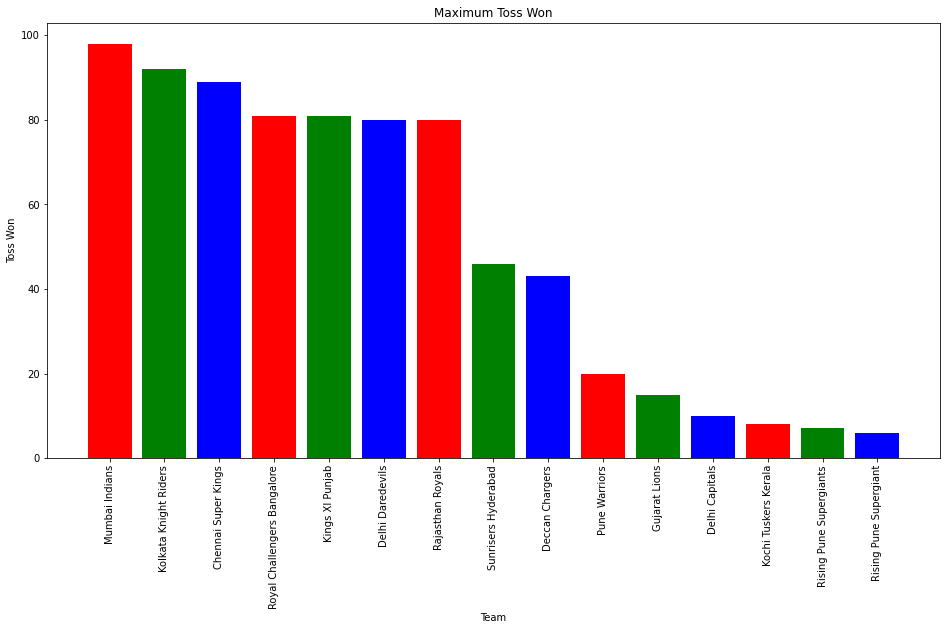

In [ ]:
res = df_matches["toss_winner"].value_counts()
team = list(res.index)
count = list(res.values)
  
fig = plt.figure(figsize = (16, 8))
 
# creating the bar plot
plt.bar(team, count, color ='rgb')

plt.xticks(rotation=90)
plt.xlabel("Team")
plt.ylabel("Toss Won")
plt.title("Maximum Toss Won")
plt.show()

In [ ]:
df_matches['toss_win_game_win'] = np.where((df_matches.toss_winner == df_matches.winner),'Yes','No')
res = df_matches['toss_win_game_win'].value_counts()

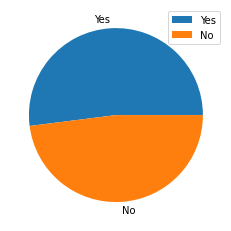

In [ ]:
y = [round(res[0]/(res[0]+res[1]),2)*100, round(res[1]/(res[0]+res[1]),2)*100]
labels = res.index
plt.pie(y, labels = labels)
plt.legend()
plt.show() 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  if __name__ == '__main__':


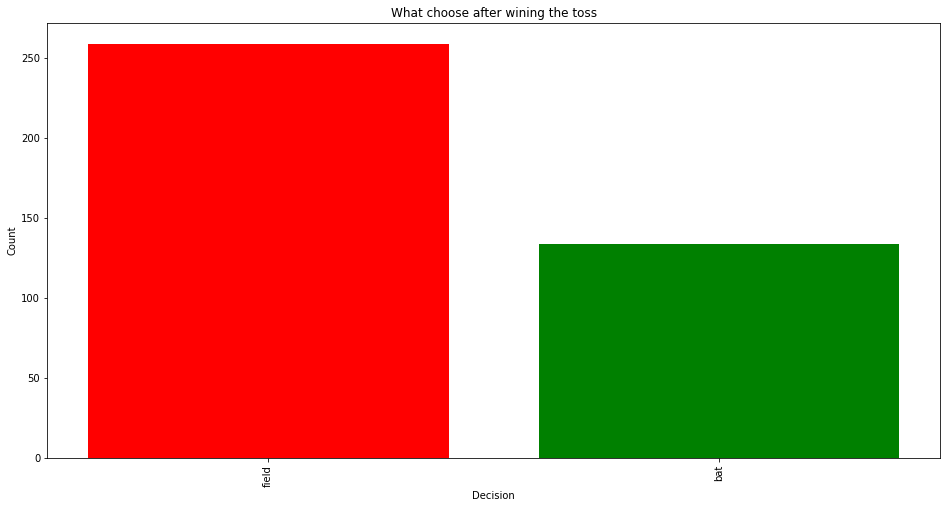

In [ ]:
res = df_matches[df_matches["toss_win_game_win"] == "Yes"]["toss_decision"].value_counts()

decision = list(res.index)
count = list(res.values)
  
fig = plt.figure(figsize = (16, 8))
 
# creating the bar plot
plt.bar(decision, count, color ='rgb')

plt.xticks(rotation=90)
plt.xlabel("Decision")
plt.ylabel("Count")
plt.title("What choose after wining the toss")
plt.show()

In [ ]:
res = df_matches.groupby(["toss_win_game_win", "toss_decision"])["match_id"].count().reset_index()
res

,toss_win_game_win,toss_decision,match_id
0,No,bat,159
1,No,field,204
2,Yes,bat,134
3,Yes,field,259


Text(0, 0.5, 'Frequency')

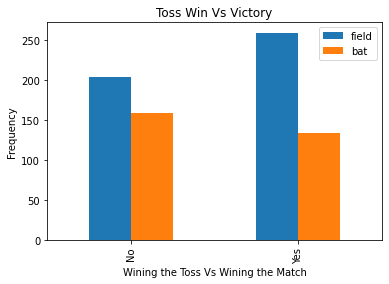

In [ ]:
index = res["toss_win_game_win"].unique()
toss_bat = res[res["toss_decision"] == "bat"]["match_id"]
toss_field = res[res["toss_decision"] == "field"]["match_id"]
df = pd.DataFrame({
      "field" : toss_field.values,
      "bat" : toss_bat.values
},index=index)

df.plot(kind="bar")
plt.title("Toss Win Vs Victory")
plt.xlabel("Wining the Toss Vs Wining the Match")
plt.ylabel("Frequency")

In [ ]:
df_delivery.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [ ]:
pd.DataFrame({
    "balls" : df_delivery.groupby(["batsman"])["ball"].count(),
    "runs" : df_delivery.groupby(["batsman"])["batsman_runs"].sum(),
    "batting_strike_rate": np.round((df_delivery.groupby(["batsman"])["batsman_runs"].sum()/df_delivery.groupby(["batsman"])["ball"].count())*100,2)
}).sort_values(by=['runs'], ascending=False)

,balls,runs,batting_strike_rate
batsman,,,
V Kohli,4211,5434,129.04
SK Raina,4044,5415,133.90
RG Sharma,3816,4914,128.77
DA Warner,3398,4741,139.52
S Dhawan,3776,4632,122.67
...,...,...,...
IC Pandey,2,0,0.00
J Denly,1,0,0.00
P Raj,1,0,0.00


In [ ]:
df_0 = df_delivery.query('batsman_runs == 0')
df_4 = df_delivery.query('batsman_runs == 4')
df_1 = df_delivery.query('batsman_runs == 1')
df_6 = df_delivery.query('batsman_runs == 6')
df_3 = df_delivery.query('batsman_runs == 3')
df_2 = df_delivery.query('batsman_runs == 2')
df_5 = df_delivery.query('batsman_runs == 5')
df_7 = df_delivery.query('batsman_runs == 7')
analysis = pd.DataFrame({
    "balls" : df_delivery.groupby(["batsman"])["ball"].count(),
    "runs" : df_delivery.groupby(["batsman"])["batsman_runs"].sum(),
    "batting_strike_rate": np.round((df_delivery.groupby(["batsman"])["batsman_runs"].sum()/df_delivery.groupby(["batsman"])["ball"].count())*100,2),
    "0s": df_0.groupby(["batsman"])["batsman_runs"].count(),
    "4s": df_4.groupby(["batsman"])["batsman_runs"].count(),
    "1s": df_1.groupby(["batsman"])["batsman_runs"].count(),
    "6s": df_6.groupby(["batsman"])["batsman_runs"].count(),
    "3s": df_3.groupby(["batsman"])["batsman_runs"].count(),
    "2s": df_2.groupby(["batsman"])["batsman_runs"].count(),
    "5s": df_5.groupby(["batsman"])["batsman_runs"].count(),
    "7s": df_7.groupby(["batsman"])["batsman_runs"].count(),
    "matches_played" : df_delivery.groupby(["batsman"])["match_id"].nunique()
}).sort_values(by=['runs'], ascending=False).fillna(0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  import sys


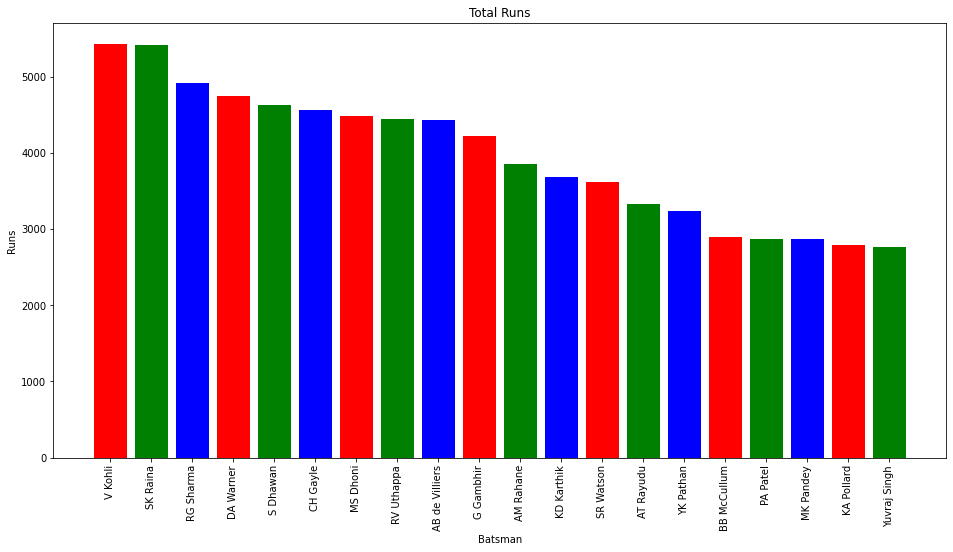

In [ ]:
batsman = analysis.index[:20]
runs = analysis["runs"][:20]
  
fig = plt.figure(figsize = (16, 8))
 
# creating the bar plot
plt.bar(batsman, runs, color ='rgb')

plt.xticks(rotation=90)
plt.xlabel("Batsman")
plt.ylabel("Runs")
plt.title("Total Runs")
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  import sys


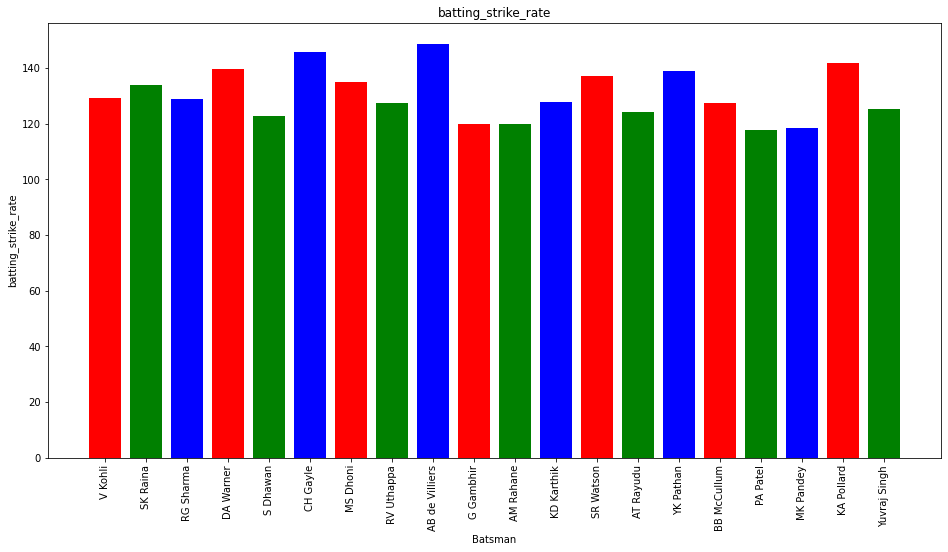

In [ ]:
batsman = analysis.index[:20]
runs = analysis["batting_strike_rate"][:20]
  
fig = plt.figure(figsize = (16, 8))
 
# creating the bar plot
plt.bar(batsman, runs, color ='rgb')

plt.xticks(rotation=90)
plt.xlabel("Batsman")
plt.ylabel("batting_strike_rate")
plt.title("batting_strike_rate")
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  import sys


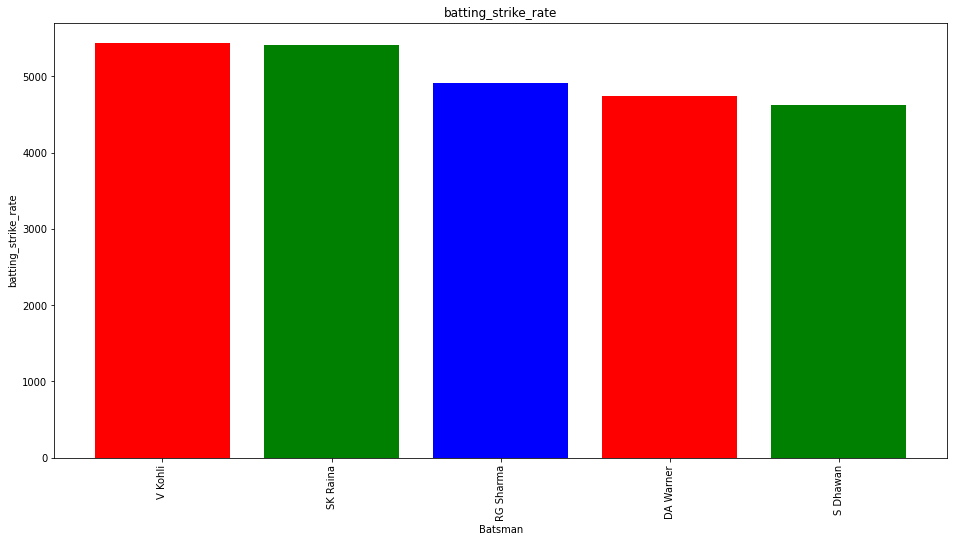

In [ ]:
batsman = analysis.index[:5]
runs = analysis["runs"][:5]
  
fig = plt.figure(figsize = (16, 8))
 
# creating the bar plot
plt.bar(batsman, runs, color ='rgb')

plt.xticks(rotation=90)
plt.xlabel("Batsman")
plt.ylabel("batting_strike_rate")
plt.title("batting_strike_rate")
plt.show()

In [ ]:
df_delivery

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,No wicket,No wicket,No wicket
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,No wicket,No wicket,No wicket
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,No wicket,No wicket,No wicket
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,No wicket,No wicket,No wicket
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,No wicket,No wicket,No wicket
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,No wicket,No wicket,No wicket
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,No wicket,No wicket,No wicket
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,No wicket,No wicket,No wicket


In [ ]:
df_w = df_delivery.query('player_dismissed != "No wicket"')
analysis_bowler = pd.DataFrame({
    "runs" : df_delivery.groupby(["bowler"])["total_runs"].sum(),
    "balls" : df_delivery.groupby(["bowler"])["ball"].count(),
    "wickets": df_w.groupby(["bowler"])["ball"].count(),
    "economy": df_delivery.groupby(["bowler"])["total_runs"].sum()/df_delivery.groupby(["bowler"])["over"].count()*6
}).sort_values(by=['wickets'], ascending=False).fillna(0)
analysis_bowler

,runs,balls,wickets,economy
bowler,,,,
SL Malinga,3511,2974,188.0,7.083389
DJ Bravo,3733,2711,168.0,8.261896
A Mishra,3850,3172,165.0,7.282472
Harbhajan Singh,4050,3451,161.0,7.041437
PP Chawla,4153,3157,156.0,7.892936
...,...,...,...,...
SR Tendulkar,59,37,0.0,9.567568
Sunny Gupta,47,19,0.0,14.842105
Tejas Baroka,33,21,0.0,9.428571


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  


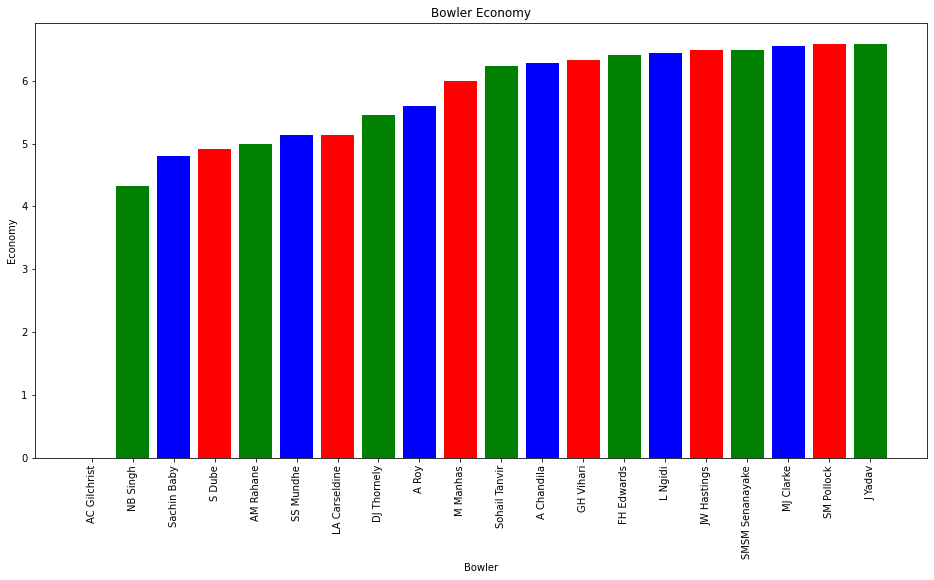

In [ ]:
df_eco = analysis_bowler.sort_values(by=["economy"])
bowler = df_eco.index[:20]
economy = df_eco["economy"][:20]
  
fig = plt.figure(figsize = (16, 8))
 
# creating the bar plot
plt.bar(bowler, economy, color ='rgb')

plt.xticks(rotation=90)
plt.xlabel("Bowler")
plt.ylabel("Economy")
plt.title("Bowler Economy")
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  import sys


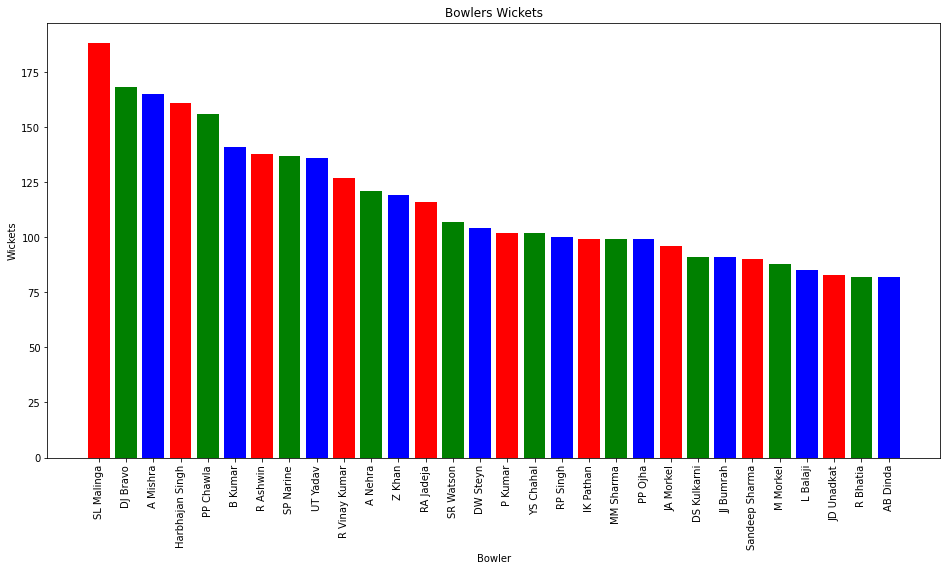

In [ ]:
bowler = analysis_bowler.index[:30]
wickets = analysis_bowler["wickets"][:30]
  
fig = plt.figure(figsize = (16, 8))
 
# creating the bar plot
plt.bar(bowler, wickets, color ='rgb')

plt.xticks(rotation=90)
plt.xlabel("Bowler")
plt.ylabel("Wickets")
plt.title("Bowlers Wickets")
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  import sys


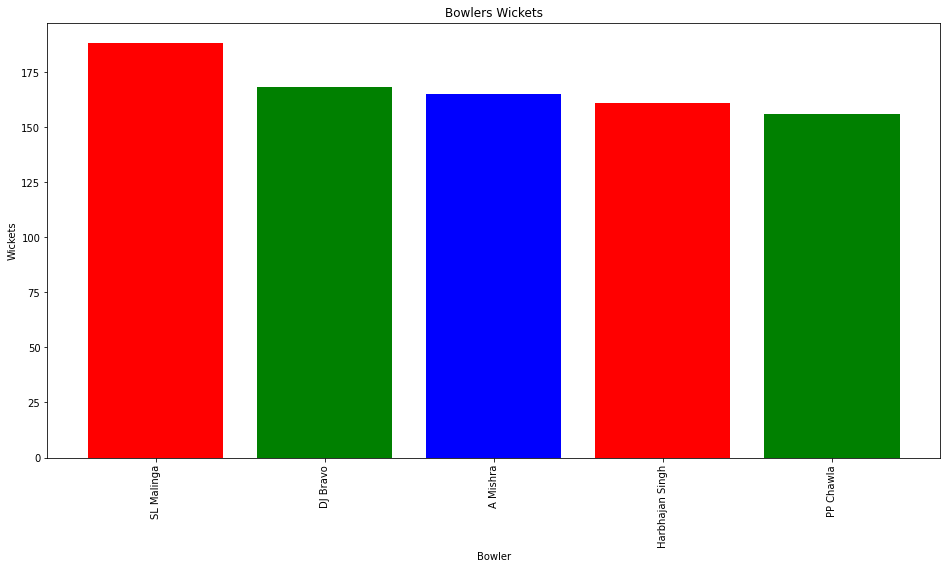

In [ ]:
bowler = analysis_bowler.index[:5]
wickets = analysis_bowler["wickets"][:5]
  
fig = plt.figure(figsize = (16, 8))
 
# creating the bar plot
plt.bar(bowler, wickets, color ='rgb')

plt.xticks(rotation=90)
plt.xlabel("Bowler")
plt.ylabel("Wickets")
plt.title("Bowlers Wickets")
plt.show()

# Conclusion

- Mistake in runs and balls in bowler analysis
- Lasith Malina is highest wicket taker with economy of 7.083389 
- Top 5 wicket taking bolwers are SL Malinga, DJ Bravo, A Mishra, Harbhajan singh, PP Chawala
- Highest run Scorer is Virat kohli
- Chennai Super KIngs Played most number of matches with winloss ration of 0.61